# UNN

## Machine learning lab

Этот набор данных для Pokemon-ов, который включает в себя:
1. Name: Название каждого покемона
2. Type 1: у каждого покемона есть тип, который определяет бессилие / сопротивление атакам
3. Type 2: некоторые покемоны имеют двойной тип
4. базовую статистику:

    a) Total: сумма всех статистических данных, которые появляются после этого, общее руководство о том, насколько сильным является покемон
    
    b) HP: очки здоровья или здоровье, определяет, сколько урона может покемон преодолеть до обморока
    
    c) Attack: базовый модификатор для обычных атак (например, Scratch, Punch)
    
    d) Defense: сопротивление базовому урону от обычных атак
    
    e) SP Atk: специальная атака, базовый модификатор для специальных атак (например, огонь, пузырь)
    
    f) SP Def: сопротивление базового урона от специальных атак
    
    g) Speed: скорость атаки
    
    
5. так же для кажого покемона указано:

    a) поколение (generation)
    
    b) легендарность (legendary)

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sbn
import csv as cs
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
%matplotlib inline

### Загрузка данных

In [71]:
data = pd.read_csv('pokemon.csv', sep = ',', engine = 'python')
type(data)

pandas.core.frame.DataFrame

In [72]:
data

Name    Type_1  Type_2  Total   HP  Attack  Defense  \
0                    Bulbasaur     Grass  Poison    318   45      49       49   
1                      Ivysaur     Grass  Poison    405   60      62       63   
2                     Venusaur     Grass  Poison    525   80      82       83   
3        VenusaurMega Venusaur     Grass  Poison    625   80     100      123   
4                   Charmander      Fire     NaN    309   39      52       43   
5                   Charmeleon      Fire     NaN    405   58      64       58   
6                    Charizard      Fire  Flying    534   78      84       78   
7    CharizardMega Charizard X      Fire  Dragon    634   78     130      111   
8    CharizardMega Charizard Y      Fire  Flying    634   78     104       78   
9                     Squirtle     Water     NaN    314   44      48       65   
10                   Wartortle     Water     NaN    405   59      63       80   
11                   Blastoise     Water     NaN    530   79      83      100   
12     BlastoiseMega Blastoise     Water     NaN    630   79     103      120   
13                    Caterpie       Bug     NaN    195   45      30       35   
14                     Metapod       Bug     NaN    205   50      20       55   
15                  Butterfree       Bug  Flying    395   60      45       50   
16                      Weedle       Bug  Poison    195   40      35       30   
17                      Kakuna       Bug  Poison    205   45      25       50   
18                    Beedrill       Bug  Poison    395   65      90       40   
19       BeedrillMega Beedrill       Bug  Poison    495   65     150       40   
20                      Pidgey    Normal  Flying    251   40      45       40   
21                   Pidgeotto    Normal  Flying    349   63      60       55   
22                     Pidgeot    Normal  Flying    479   83      80       75   
23         PidgeotMega Pidgeot    Normal  Flying    579   83      80       80   
24                     Rattata    Normal     NaN    253   30      56       35   
25                    Raticate    Normal     NaN    413   55      81       60   
26                     Spearow    Normal  Flying    262   40      60       30   
27                      Fearow    Normal  Flying    442   65      90       65   
28                       Ekans    Poison     NaN    288   35      60       44   
29                       Arbok    Poison     NaN    438   60      85       69   
..                         ...       ...     ...    ...  ...     ...      ...   
770                    Sylveon     Fairy     NaN    525   95      65       65   
771                   Hawlucha  Fighting  Flying    500   78      92       75   
772                    Dedenne  Electric   Fairy    431   67      58       57   
773                    Carbink      Rock   Fairy    500   50      50      150   
774                      Goomy    Dragon     NaN    300   45      50       35   
775                    Sliggoo    Dragon     NaN    452   68      75       53   
776                     Goodra    Dragon     NaN    600   90     100       70   
777                     Klefki     Steel   Fairy    470   57      80       91   
778                   Phantump     Ghost   Grass    309   43      70       48   
779                  Trevenant     Ghost   Grass    474   85     110       76   
780      PumpkabooAverage Size     Ghost   Grass    335   49      66       70   
781        PumpkabooSmall Size     Ghost   Grass    335   44      66       70   
782        PumpkabooLarge Size     Ghost   Grass    335   54      66       70   
783        PumpkabooSuper Size     Ghost   Grass    335   59      66       70   
784      GourgeistAverage Size     Ghost   Grass    494   65      90      122   
785        GourgeistSmall Size     Ghost   Grass    494   55      85      122   
786        GourgeistLarge Size     Ghost   Grass    494   75      95      122   
787        GourgeistSuper Size     Ghost   Grass    494  

### Анализ данных

In [73]:
print(data.shape)

(800, 12)


таблица содержит 800 строк (объектов) и 12 столбцов (признаков), выведенных ниже, включая выходной (целевой) признак.

In [74]:
cols = list(data.columns.values)
print(cols)

['Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'Legendary']


Для получения представления об имеющихся данных выведем первые несколько строк:

In [75]:
data.head()

Name Type_1  Type_2  Total  HP  Attack  Defense  Sp_Atk  \
0              Bulbasaur  Grass  Poison    318  45      49       49      65   
1                Ivysaur  Grass  Poison    405  60      62       63      80   
2               Venusaur  Grass  Poison    525  80      82       83     100   
3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123     122   
4             Charmander   Fire     NaN    309  39      52       43      60   

   Sp_Def  Speed  Generation  Legendary  
0      65     45           1      False  
1      80     60           1      False  
2     100     80           1      False  
3     120     80           1      False  
4      50     65           1      False

In [76]:
data.describe()

Total          HP      Attack     Defense      Sp_Atk      Sp_Def  \
count  800.00000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean   435.10250   69.258750   79.001250   73.842500   72.820000   71.902500   
std    119.96304   25.534669   32.457366   31.183501   32.722294   27.828916   
min    180.00000    1.000000    5.000000    5.000000   10.000000   20.000000   
25%    330.00000   50.000000   55.000000   50.000000   49.750000   50.000000   
50%    450.00000   65.000000   75.000000   70.000000   65.000000   70.000000   
75%    515.00000   80.000000  100.000000   90.000000   95.000000   90.000000   
max    780.00000  255.000000  190.000000  230.000000  194.000000  230.000000   

            Speed  Generation  
count  800.000000   800.00000  
mean    68.277500     3.32375  
std     29.060474     1.66129  
min      5.000000     1.00000  
25%     45.000000     2.00000  
50%     65.000000     3.00000  
75%     90.000000     5.00000  
max    180.000000     6.00000

Корреляция признаков:

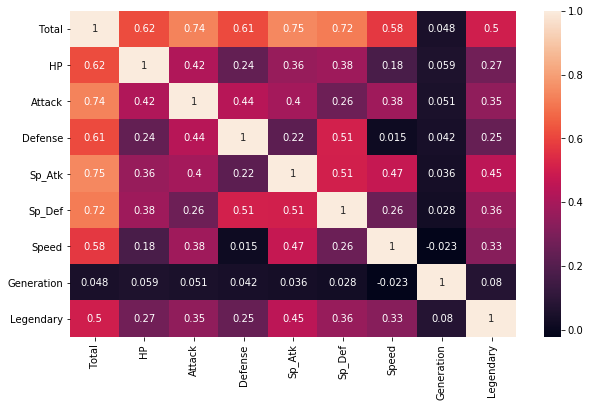

In [77]:
plt.figure(figsize=(10,6))
sbn.heatmap(data.corr(),annot=True) 
plt.show()

In [78]:
data.corr()

Total        HP    Attack   Defense    Sp_Atk    Sp_Def  \
Total       1.000000  0.618748  0.736211  0.612787  0.747250  0.717609   
HP          0.618748  1.000000  0.422386  0.239622  0.362380  0.378718   
Attack      0.736211  0.422386  1.000000  0.438687  0.396362  0.263990   
Defense     0.612787  0.239622  0.438687  1.000000  0.223549  0.510747   
Sp_Atk      0.747250  0.362380  0.396362  0.223549  1.000000  0.506121   
Sp_Def      0.717609  0.378718  0.263990  0.510747  0.506121  1.000000   
Speed       0.575943  0.175952  0.381240  0.015227  0.473018  0.259133   
Generation  0.048384  0.058683  0.051451  0.042419  0.036437  0.028486   
Legendary   0.501758  0.273620  0.345408  0.246377  0.448907  0.363937   

               Speed  Generation  Legendary  
Total       0.575943    0.048384   0.501758  
HP          0.175952    0.058683   0.273620  
Attack      0.381240    0.051451   0.345408  
Defense     0.015227    0.042419   0.246377  
Sp_Atk      0.473018    0.036437   0.448907  
Sp_Def      0.259133    0.028486   0.363937  
Speed       1.000000   -0.023121   0.326715  
Generation -0.023121    1.000000   0.079794  
Legendary   0.326715    0.079794   1.000000

Зависимость скорости атаки от типа покемона:

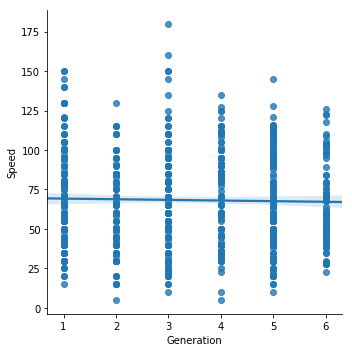

In [79]:
sbn.lmplot(x="Generation", y="Speed", data=data)

Из этого видим, что зависимости между поколением и скоростью атаки у покемонов нет.

Зависимость сопротивления против специальних атак от сопротивления:

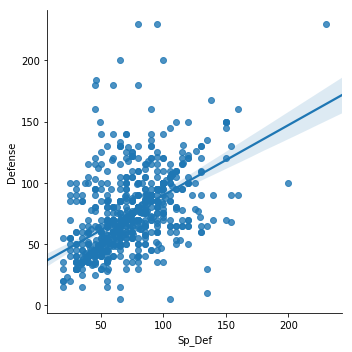

In [80]:
sbn.lmplot(x="Sp_Def", y="Defense", data=data)

Количество покемонов по их типам

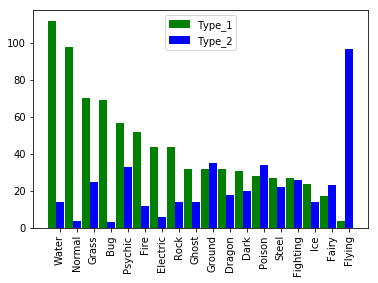

In [81]:
vals1 = [data['Type_1'].value_counts()[key] for key in data['Type_1'].value_counts().index]
vals2 = [data['Type_2'].value_counts()[key] for key in data['Type_1'].value_counts().index]
inds = np.arange(len(data['Type_1'].value_counts().index))
width = .45
handles = [ptc.Patch(color='g', label='Type_1'), ptc.Patch(color='b', label='Type_2')]
plt.bar(inds, vals1, width, color='g')
plt.bar(inds+width, vals2, width, color='b')
plt.gca().set_xticklabels(data['Type_1'].value_counts().index)
plt.gca().set_xticks(inds+width)
plt.xticks(rotation=90)
plt.legend(handles=handles)
pass

Total для легендарных покемонов по отдельным типам:

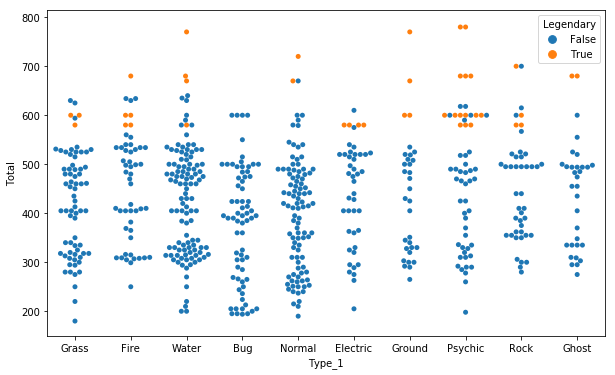

In [82]:
plt.figure(figsize=(10,6))
top_types=data['Type_1'].value_counts()[:10] 
df1=data[data['Type_1'].isin(top_types.index)]
sbn.swarmplot(x='Type_1',y='Total',data=df1, hue='Legendary')
plt.show()

### Перед нами будет стоять задача по определению легендарности покемона на основе его характиристик.

#### Подготовка данных

Алгоритмы машинного обучения из библиотеки scikit-learn не работают напрямую с категориальными признаками и данными, в которых имеются пропущенные значения. Поэтому вначале подготовим наши данные.

In [83]:
data.count(axis=0)

Name          800
Type_1        800
Type_2        414
Total         800
HP            800
Attack        800
Defense       800
Sp_Atk        800
Sp_Def        800
Speed         800
Generation    800
Legendary     800
dtype: int64

Можно увидеть, что почти для половины покемонов не указан второй признак.

In [84]:
data[data.Type_2.isnull()].head()

Name Type_1 Type_2  Total  HP  Attack  Defense  Sp_Atk  Sp_Def  \
4   Charmander   Fire    NaN    309  39      52       43      60      50   
5   Charmeleon   Fire    NaN    405  58      64       58      80      65   
9     Squirtle  Water    NaN    314  44      48       65      50      64   
10   Wartortle  Water    NaN    405  59      63       80      65      80   
11   Blastoise  Water    NaN    530  79      83      100      85     105   

    Speed  Generation  Legendary  
4      65           1      False  
5      80           1      False  
9      43           1      False  
10     58           1      False  
11     78           1      False

In [85]:
data['Type_1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [86]:
data['Type_2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

Type_2 является категориальным признаком, есть два варианта, как поступить с незаполнеными значениями: заполнение пропущенных значений самым популярным в столбце или удалить этот столбец.

In [87]:
data['Type_2'].describe()

count        414
unique        18
top       Flying
freq          97
Name: Type_2, dtype: object

Самый частый встречающийся Type_2 - это "Летающий", однако добавлять покемонам у которых нет второго типа такую способность будет неверным шагом, поэтому было решено удалить эту колонку для дальнейших вычислений.

In [88]:
data = data.drop('Type_2', axis=1)

А так же уберем имена покемонов и сумму всех статистических данных:

In [89]:
data = data.drop('Name', axis=1)
data = data.drop('Total', axis=1)

In [90]:
data.describe()

HP      Attack     Defense      Sp_Atk      Sp_Def       Speed  \
count  800.000000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean    69.258750   79.001250   73.842500   72.820000   71.902500   68.277500   
std     25.534669   32.457366   31.183501   32.722294   27.828916   29.060474   
min      1.000000    5.000000    5.000000   10.000000   20.000000    5.000000   
25%     50.000000   55.000000   50.000000   49.750000   50.000000   45.000000   
50%     65.000000   75.000000   70.000000   65.000000   70.000000   65.000000   
75%     80.000000  100.000000   90.000000   95.000000   90.000000   90.000000   
max    255.000000  190.000000  230.000000  194.000000  230.000000  180.000000   

       Generation  
count   800.00000  
mean      3.32375  
std       1.66129  
min       1.00000  
25%       2.00000  
50%       3.00000  
75%       5.00000  
max       6.00000

#### Категориальные и числовые признаки:

In [91]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print (categorical_columns)
print (numerical_columns)

['Type_1']
['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'Legendary']


#### Небинарные признаки

Применим метод векторизации

In [96]:
data_nonbinary = data['Type_1'].astype('category').cat.codes
y = np.array([1 if it == True else 0 for it in data['Legendary']])
data = data.drop('Legendary', axis=1)

In [97]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print (categorical_columns)
print (numerical_columns)

['Type_1']
['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation']


#### Нормализация количественных признаков

In [98]:
data_numerical = data[numerical_columns]
data_numerical.describe()

HP      Attack     Defense      Sp_Atk      Sp_Def       Speed  \
count  800.000000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean    69.258750   79.001250   73.842500   72.820000   71.902500   68.277500   
std     25.534669   32.457366   31.183501   32.722294   27.828916   29.060474   
min      1.000000    5.000000    5.000000   10.000000   20.000000    5.000000   
25%     50.000000   55.000000   50.000000   49.750000   50.000000   45.000000   
50%     65.000000   75.000000   70.000000   65.000000   70.000000   65.000000   
75%     80.000000  100.000000   90.000000   95.000000   90.000000   90.000000   
max    255.000000  190.000000  230.000000  194.000000  230.000000  180.000000   

       Generation  
count   800.00000  
mean      3.32375  
std       1.66129  
min       1.00000  
25%       2.00000  
50%       3.00000  
75%       5.00000  
max       6.00000

In [100]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

HP        Attack       Defense        Sp_Atk        Sp_Def  \
count  8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02   
mean   4.747591e-16  6.189493e-17 -8.215650e-17 -5.634382e-17  9.714451e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.673179e+00 -2.279952e+00 -2.207658e+00 -1.919792e+00 -1.865056e+00   
25%   -7.542197e-01 -7.394701e-01 -7.645870e-01 -7.050239e-01 -7.870411e-01   
50%   -1.667831e-01 -1.232771e-01 -1.232222e-01 -2.389808e-01 -6.836414e-02   
75%    4.206536e-01  6.469641e-01  5.181426e-01  6.778253e-01  6.503128e-01   
max    7.274081e+00  3.419832e+00  5.007696e+00  3.703286e+00  5.681051e+00   

              Speed    Generation  
count  8.000000e+02  8.000000e+02  
mean   4.655998e-17 -9.665047e-15  
std    1.000000e+00  1.000000e+00  
min   -2.177442e+00 -1.398762e+00  
25%   -8.010021e-01 -7.968204e-01  
50%   -1.127821e-01 -1.948786e-01  
75%    7.474930e-01  1.009005e+00  
max    3.844483e+00  1.610947e+00

In [101]:
data = data_numerical
data['Type'] = data_nonbinary
print(data.shape)
print (data.columns)

(800, 8)
Index(['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation',
       'Type'],
      dtype='object')


In [102]:
data.describe()

HP        Attack       Defense        Sp_Atk        Sp_Def  \
count  8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02  8.000000e+02   
mean   4.747591e-16  6.189493e-17 -8.215650e-17 -5.634382e-17  9.714451e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.673179e+00 -2.279952e+00 -2.207658e+00 -1.919792e+00 -1.865056e+00   
25%   -7.542197e-01 -7.394701e-01 -7.645870e-01 -7.050239e-01 -7.870411e-01   
50%   -1.667831e-01 -1.232771e-01 -1.232222e-01 -2.389808e-01 -6.836414e-02   
75%    4.206536e-01  6.469641e-01  5.181426e-01  6.778253e-01  6.503128e-01   
max    7.274081e+00  3.419832e+00  5.007696e+00  3.703286e+00  5.681051e+00   

              Speed    Generation        Type  
count  8.000000e+02  8.000000e+02  800.000000  
mean   4.655998e-17 -9.665047e-15    9.467500  
std    1.000000e+00  1.000000e+00    5.580356  
min   -2.177442e+00 -1.398762e+00    0.000000  
25%   -8.010021e-01 -7.968204e-01    5.000000  
50%   -1.127821e-01 -1.948786e-01   10.000000  
75%    7.474930e-01  1.009005e+00   14.000000  
max    3.844483e+00  1.610947e+00   17.000000

In [104]:
Z = data
names = Z.columns
print(names)

Index(['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation',
       'Type'],
      dtype='object')


In [107]:
print(Z.shape)
N, d = Z.shape

(800, 8)


#### Обучающая и тестовая выборки

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size = 0.3, random_state = 1)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

560 240


In [110]:
tt_errors = pd.DataFrame(columns=['model', 'train_errors', 'test_errors'])

### KNN – метод ближайших соседей

In [111]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [112]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print ('Error train:', err_train)
print ('Error test:', err_test)

Error train: 0.06607142857142857
Error test: 0.09166666666666666


#### Побор параметров

In [114]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.044642857142857095 1


#### Запуск kNN

In [115]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.0 0.09583333333333334
